In [5]:
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score ,roc_auc_score ,roc_curve, auc , precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

plt.style.use('seaborn')
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.max_rows', 100)

# GradientBoostingClassifier

In [2]:
#reading the data
from scaled_data import *
df_X,df_y = clean_data()


#### Baseline with no feature selection/tuning or oversampling

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2592
           1       0.67      0.56      0.61       491

    accuracy                           0.89      3083
   macro avg       0.79      0.76      0.77      3083
weighted avg       0.88      0.89      0.88      3083

Test Metrics
Accuracy: 0.88582549464807
Precision: 0.6674698795180722
Recall: 0.5641547861507128
AUC 0.755457022704986


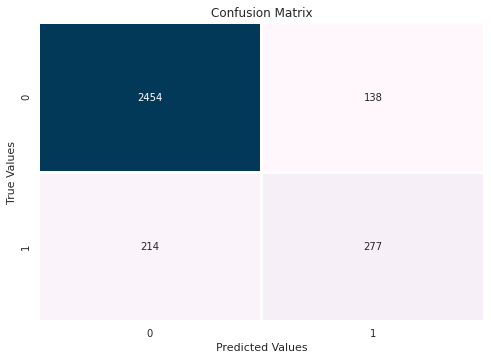

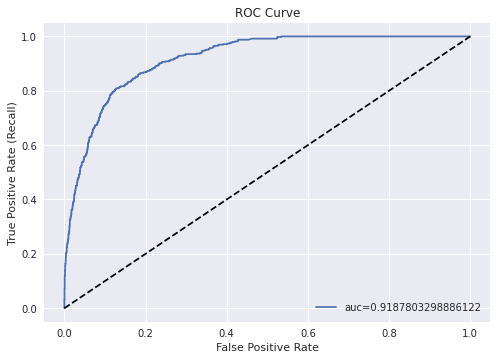

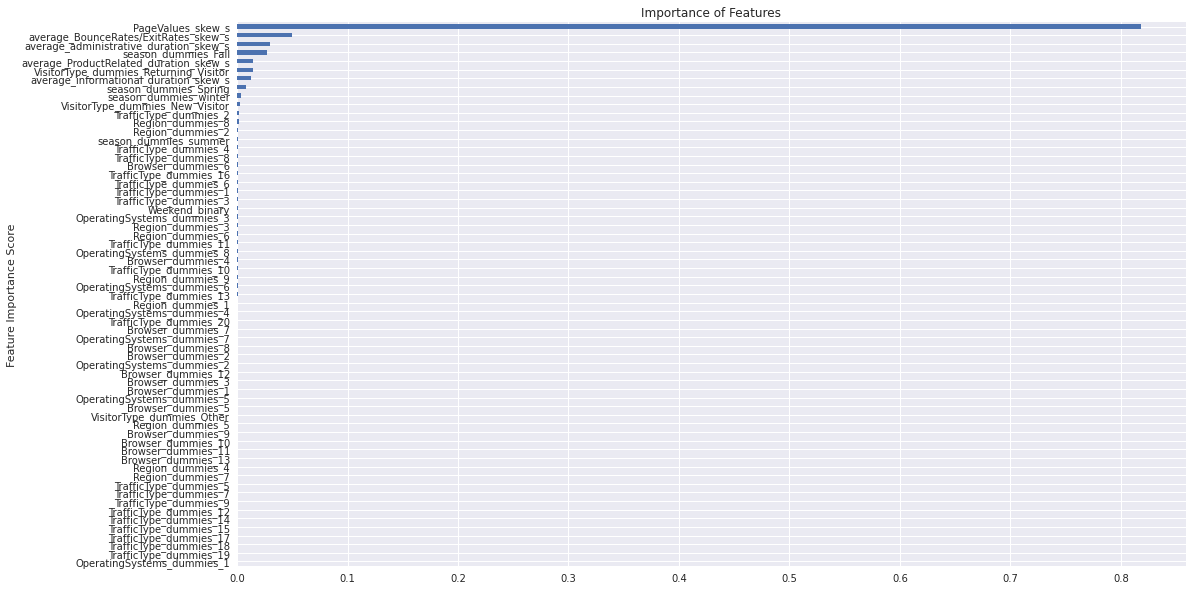

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, RepeatedKFold

gbm_model_Xdata = df_X.copy() #making our X columns


#getting the values of our x features:

Xgbm_model = gbm_model_Xdata.values

#getting the values of our y:
y_gbm_model = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(Xgbm_model, y_gbm_model , test_size=0.25, random_state=123)




baseline = GradientBoostingClassifier(random_state=123)
baseline.fit(X_train,y_train)


pred=baseline.predict(X_test)
print(classification_report(y_test, pred))

print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,pred))
print("Precision:",precision_score(y_test,pred))
print("Recall:",recall_score(y_test,pred))
roc_auc = roc_auc_score(y_test, pred)
print('AUC' ,roc_auc)

confusion_matrix = confusion_matrix(y_test, pred)


sns.heatmap(confusion_matrix, annot=True,cmap = "PuBu"  ,fmt="d",lw = 2,
                cbar=False)

plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix")
plt.show()


y_pred_proba = baseline.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.show()


feat_imp = pd.Series(baseline.feature_importances_, gbm_model_Xdata.columns).sort_values(ascending=True)
feat_imp.plot(kind='barh', title='Importance of Features' , figsize = (17,10))
plt.ylabel('Feature Importance Score')
plt.show()

#### Model #1  with only oversampling

Test Metrics
Accuracy: 0.8728511190398962
Precision: 0.5797101449275363
Recall: 0.7331975560081466
AUC 0.8162515557818512
f1 0.8786481082770713
Test Classification Report
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      2592
           1       0.58      0.73      0.65       491

    accuracy                           0.87      3083
   macro avg       0.76      0.82      0.78      3083
weighted avg       0.89      0.87      0.88      3083



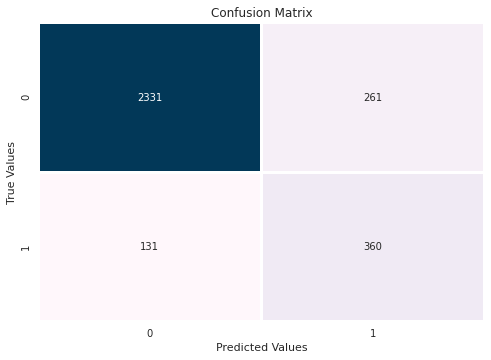

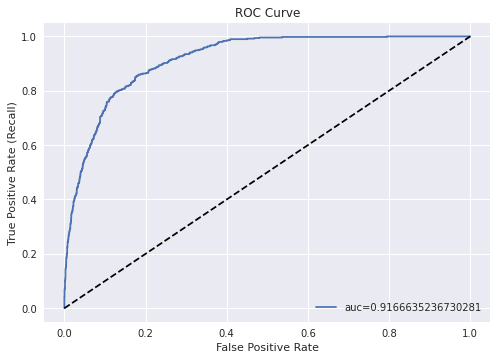

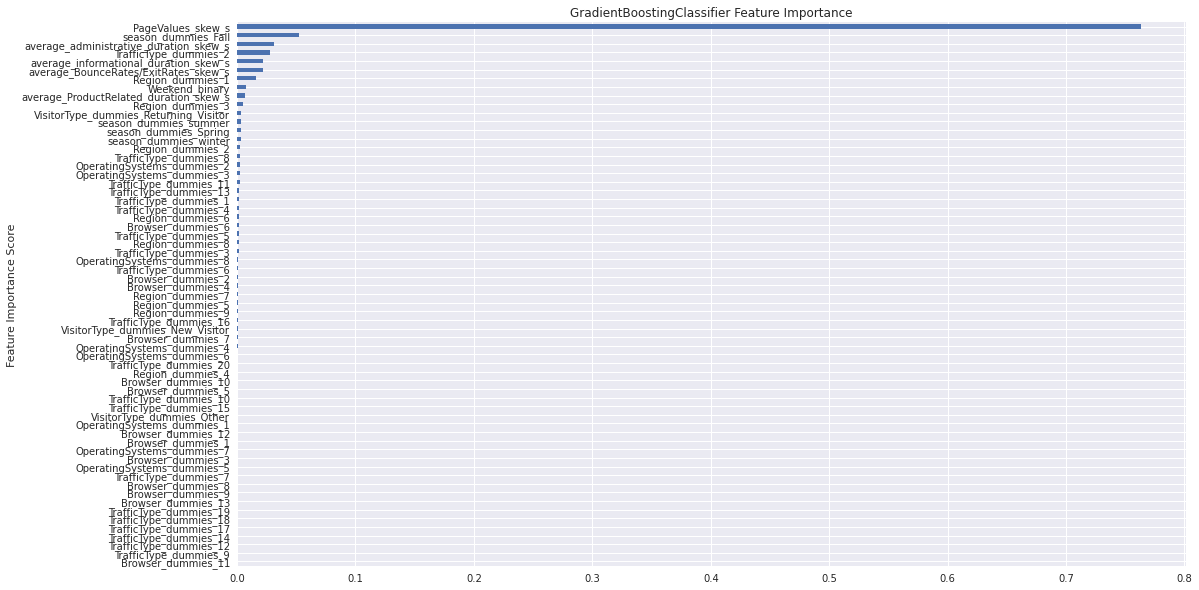

'rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)\nf1_scores_cv = cross_val_score(gbm_model,X_train_bal, y_train_bal, scoring=\'f1\', cv=rkf)\nroc_auc_cv = cross_val_score(gbm_model,X_train_bal, y_train_bal, scoring=\'roc_auc\', cv=rkf)\n\nprint("model bias (f1-score):", f1_scores_cv.mean())\nprint("model variance (f1-score):", f1_scores_cv.std())\nprint("model bias (ROC/AUC):", roc_auc_cv.mean())\nprint("model variance (ROC/AUC):", roc_auc_cv.std())'

In [6]:
from sklearn.ensemble import GradientBoostingClassifier


gbm_model_Xdata = df_X.copy() #making our X columns


#getting the values of our x features:
#Xgbm_model = gbm_model_Xdata[best_features_spsa].values
#Xgbm_model= gbm_model_Xdata[cols_2].values
Xgbm_model = gbm_model_Xdata.values

#getting the values of our y:
y_gbm_model = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(Xgbm_model, y_gbm_model , test_size=0.25, random_state=123)

from imblearn.over_sampling import SMOTE

sm =SMOTE(k_neighbors=20)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)


gbm_model = GradientBoostingClassifier(random_state=123,n_estimators=50,max_depth=5,min_samples_split=40)

gbm_model.fit(X_train_bal, y_train_bal)

gbm_train_pred= gbm_model.predict(X_train_bal)

gbm_test_pred1 = gbm_model.predict(X_test)




print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,gbm_test_pred1))
print("Precision:",precision_score(y_test,gbm_test_pred1))
print("Recall:",recall_score(y_test,gbm_test_pred1))
roc_auc = roc_auc_score(y_test, gbm_test_pred1)
print('AUC:' ,roc_auc)
print("f1:",f1_score(y_test,  gbm_test_pred1, average='weighted'))
print('Test Classification Report')
print(classification_report(y_test,gbm_test_pred1))






sns.heatmap(confusion_matrix(y_test, gbm_test_pred1), annot=True,cmap = "PuBu"  ,fmt="d",lw = 2,
                cbar=False)

plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix")
plt.show()


y_pred_proba = gbm_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.show()


feat_imp = pd.Series(gbm_model.feature_importances_, gbm_model_Xdata.columns).sort_values(ascending=True)
feat_imp.plot(kind='barh', title='GradientBoostingClassifier Feature Importance' , figsize = (17,10))
plt.ylabel('Feature Importance Score')
plt.show()
'''rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(gbm_model,X_train_bal, y_train_bal, scoring='f1', cv=rkf)
roc_auc_cv = cross_val_score(gbm_model,X_train_bal, y_train_bal, scoring='roc_auc', cv=rkf)

print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())'''


# Tuning using GridSearchCV

#### Tuning n_estimators and Learning rate

In [7]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score),"f1" : "f1_weighted"}
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}
from sklearn.metrics import f1_score
scoring = {"f1" :make_scorer(f1_score)}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=123), 
            param_grid = p_test3, scoring=scoring,n_jobs=-1,iid=False, cv=5,refit='f1')
tuning.fit(X_train_bal,y_train_bal)
tuning.best_params_, tuning.best_score_

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'learning_rate': 0.05, 'n_estimators': 250}, 0.9162668088537336)

In [29]:
#print('Best params for {}'.format(refit_score))
y_pred = tuning.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test,  y_pred)
print('AUC' ,roc_auc)

from sklearn.metrics import f1_score
print(f1_score(y_test,  y_pred, average='weighted'))
tuning.best_params_, tuning.best_score_



              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2592
           1       0.62      0.61      0.62       491

    accuracy                           0.88      3083
   macro avg       0.78      0.77      0.77      3083
weighted avg       0.88      0.88      0.88      3083

AUC 0.7716021881521711


0.8792103999772327

# Tunign max_depth

In [8]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score),"f1" : "f1_weighted"}
p_test2 = {'max_depth':[2,3,4,5,6,7] }
from sklearn.metrics import f1_score
scoring = {"f1" :make_scorer(f1_score)}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.05,n_estimators=250, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=123), 
            param_grid = p_test2, scoring=scoring,n_jobs=4,iid=False, cv=5 ,refit='f1')
tuning.fit(X_train_bal,y_train_bal)
y_pred = tuning.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test,  y_pred)
print('AUC' ,roc_auc)

from sklearn.metrics import f1_score
print("f1",f1_score(y_test,  y_pred, average='weighted'))
tuning.best_params_, tuning.best_score_

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[[2423  169]
 [ 211  280]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2592
           1       0.62      0.57      0.60       491

    accuracy                           0.88      3083
   macro avg       0.77      0.75      0.76      3083
weighted avg       0.87      0.88      0.87      3083

AUC 0.7525320742500816
f1 0.8744851179954838


({'max_depth': 7}, 0.9146022354336656)

Accuracy of the GBM on test set: 0.877
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2592
           1       0.62      0.57      0.60       491

    accuracy                           0.88      3083
   macro avg       0.77      0.75      0.76      3083
weighted avg       0.87      0.88      0.87      3083



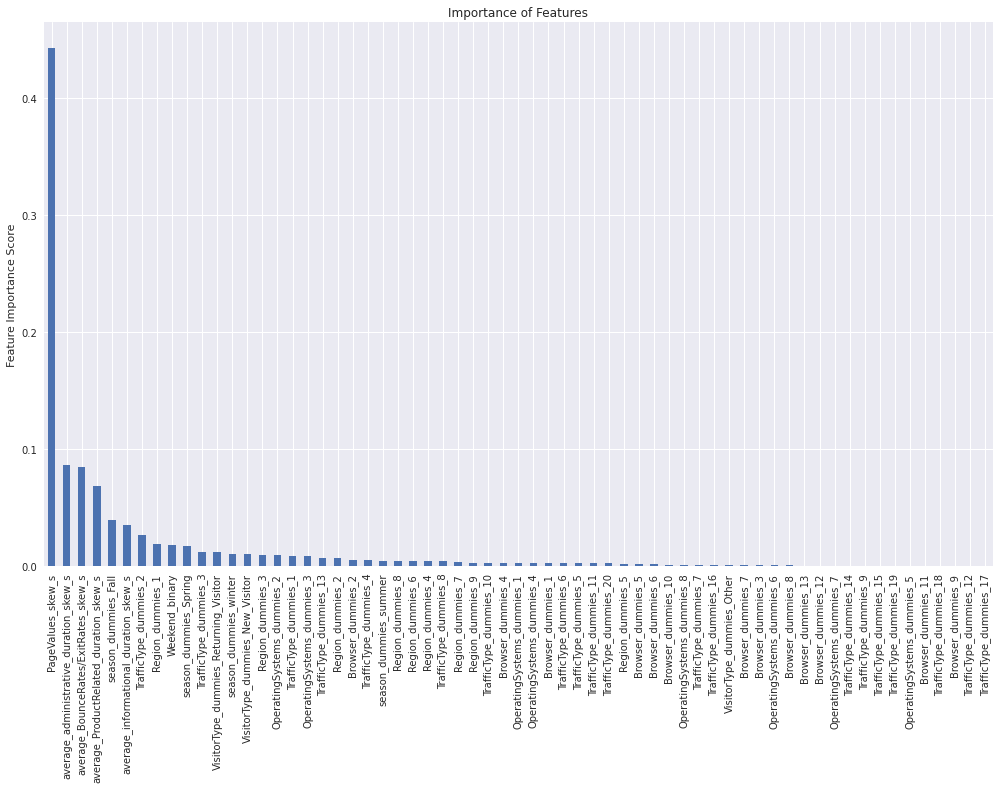

In [9]:
model1 = GradientBoostingClassifier(learning_rate=0.05,n_estimators=250,max_depth=7, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=123)
model1.fit(X_train_bal,y_train_bal)
#predictors=list(X_train)
feat_imp = pd.Series(model1.feature_importances_, gbm_model_Xdata.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features' , figsize = (17,10))
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(model1.score(X_test, y_test)))
pred=model1.predict(X_test)
print(classification_report(y_test, pred))

In [10]:
rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(model1,X_train_bal, y_train_bal, scoring='f1', cv=rkf)
roc_auc_cv = cross_val_score(model1,X_train_bal, y_train_bal, scoring='roc_auc', cv=rkf)

print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())




model bias (f1-score): 0.9425929530775561
model variance (f1-score): 0.005967008602923152
model bias (ROC/AUC): 0.9872041542089189
model variance (ROC/AUC): 0.0018923624078932544


# Min sample split and min samples leaf


In [11]:
p_test4 = {'min_samples_split':[2,4,6,8,10,20,40,60,100], 'min_samples_leaf':[1,3,5,7,9]}
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score),"f1" : make_scorer(f1_score)}
from sklearn.metrics import f1_score
scoring = {"f1" :make_scorer(f1_score)}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.05,n_estimators=250,max_depth=7, subsample=1,max_features='sqrt', random_state=123), 
            param_grid = p_test4, scoring=scoring,n_jobs=4,iid=False, cv=5 ,refit='f1')
tuning.fit(X_train_bal,y_train_bal)

y_pred = tuning.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test,  y_pred)
print('AUC' ,roc_auc)

from sklearn.metrics import f1_score
print("f1",f1_score(y_test,  y_pred, average='weighted'))
tuning.best_params_, tuning.best_score_

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[[2423  169]
 [ 211  280]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2592
           1       0.62      0.57      0.60       491

    accuracy                           0.88      3083
   macro avg       0.77      0.75      0.76      3083
weighted avg       0.87      0.88      0.87      3083

AUC 0.7525320742500816
f1 0.8744851179954838


({'min_samples_leaf': 1, 'min_samples_split': 2}, 0.9146022354336656)

# Tuning Max Features

In [14]:
#TUNING MAX FEATURES
p_test5 = {'max_features':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score),"f1" : make_scorer(f1_score)}
from sklearn.metrics import f1_score
scoring = {"f1" :make_scorer(f1_score)}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.05,n_estimators=1250,max_depth=7, min_samples_split=10, min_samples_leaf=1, subsample=1, random_state=123), 
param_grid = p_test5, scoring=scoring,n_jobs=4,iid=False, cv=5,refit='f1')
tuning.fit(X_train_bal,y_train_bal)
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test,  y_pred)
print('AUC' ,roc_auc)

from sklearn.metrics import f1_score
print("f1",f1_score(y_test,  y_pred, average='weighted'))
tuning.best_params_, tuning.best_score_

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[[2423  169]
 [ 211  280]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2592
           1       0.62      0.57      0.60       491

    accuracy                           0.88      3083
   macro avg       0.77      0.75      0.76      3083
weighted avg       0.87      0.88      0.87      3083

AUC 0.7525320742500816
f1 0.8744851179954838


({'max_features': 20}, 0.9154472468996684)

# Subsample

In [16]:
p_test6= {'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score),"f1" : make_scorer(f1_score)}
from sklearn.metrics import f1_score
scoring = {"f1" :make_scorer(f1_score)}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.05,n_estimators=1250,max_depth=7, min_samples_split=10, min_samples_leaf=1,max_features=15 , random_state=123), 
param_grid = p_test6, scoring=scoring,n_jobs=4,iid=False, cv=5 ,refit='f1')
tuning.fit(X_train,y_train)
y_pred = tuning.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test,  y_pred)
print('AUC' ,roc_auc)

from sklearn.metrics import f1_score
print("f1",f1_score(y_test,  y_pred, average='weighted'))
tuning.best_params_, tuning.best_score_

/opt/tljh/user/lib/python3.6/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[[2457  135]
 [ 226  265]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2592
           1       0.66      0.54      0.59       491

    accuracy                           0.88      3083
   macro avg       0.79      0.74      0.76      3083
weighted avg       0.88      0.88      0.88      3083

AUC 0.7438157671418874
f1 0.8779367285958443


({'subsample': 0.8}, 0.6331998031278695)

# Evaluation of final model all of the features

Test Metrics
Accuracy: 0.875445994161531
Precision: 0.6145610278372591
Recall: 0.5845213849287169
AUC 0.7575384702421363
f1 0.8741728095199162
Test Classification Report
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2592
           1       0.61      0.58      0.60       491

    accuracy                           0.88      3083
   macro avg       0.77      0.76      0.76      3083
weighted avg       0.87      0.88      0.87      3083

model bias (f1-score): 0.9414965652030518
model variance (f1-score): 0.006092739269732774
model bias (ROC/AUC): 0.9871174230761897
model variance (ROC/AUC): 0.0016496639359500562


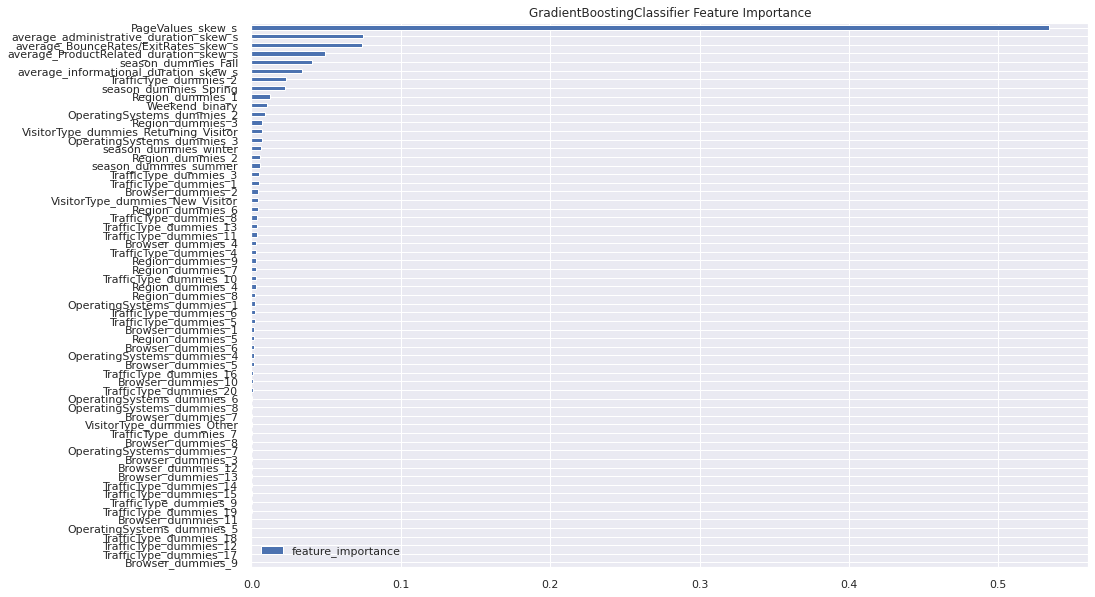

In [18]:
from sklearn.ensemble import GradientBoostingClassifier


gbm_model_Xdata = df_X.copy() #making our X columns


#getting the values of our x features:
#Xgbm_model = gbm_model_Xdata[best_features_spsa].values
#Xgbm_model= gbm_model_Xdata[cols_2].values
Xgbm_model = gbm_model_Xdata.values

#getting the values of our y:
y_gbm_model = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(Xgbm_model, y_gbm_model , test_size=0.25, random_state=123)

from imblearn.over_sampling import SMOTE

sm =SMOTE(k_neighbors=20)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)


gbm_model = GradientBoostingClassifier(learning_rate=0.05,n_estimators=1250,max_depth=7, min_samples_split=10,
                                       min_samples_leaf=1,max_features=15, subsample=0.8 , random_state=123,
                                      )

gbm_model.fit(X_train_bal, y_train_bal)

gbm_train_pred= gbm_model.predict(X_train_bal)

gbm_test_pred = gbm_model.predict(X_test)





print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,gbm_test_pred))
print("Precision:",precision_score(y_test,gbm_test_pred))
print("Recall:",recall_score(y_test,gbm_test_pred))
roc_auc = roc_auc_score(y_test, gbm_test_pred)
print('AUC' ,roc_auc)
print("f1:",f1_score(y_test,  gbm_test_pred, average='weighted'))


print('Test Classification Report')
print(classification_report(y_test,gbm_test_pred))


sns.heatmap(confusion_matrix(y_test, gbm_test_pred), annot=True,cmap = "PuBu"  ,fmt="d",lw = 2,
                cbar=False)

plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix")
plt.show()


y_pred_proba = gbm_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.show()



#https://stackoverflow.com/questions/41900387/mapping-column-names-to-random-forest-feature-importances
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(gbm_model_Xdata.columns, gbm_model.feature_importances_):
    feats[feature] = importance #add the name/value pair 
sns.set()
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'feature_importance'})
importances.sort_values(by='feature_importance').plot(kind='barh', rot=0 , figsize=(15,10) ,title ='GradientBoostingClassifier Feature Importance')
plt.show()


X_bal,y_bal =  sm.fit_sample(Xgbm_model, y_gbm_model)

rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(gbm_model,X_bal,y_bal , scoring='f1', cv=rkf)
roc_auc_cv = cross_val_score(gbm_model,X_bal,y_bal , scoring='roc_auc', cv=rkf)

print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())

In [20]:
importances.sort_values(by='feature_importance').tail(15).index


Index(['season_dummies_winter', 'OperatingSystems_dummies_3', 'VisitorType_dummies_Returning_Visitor', 'Region_dummies_3', 'OperatingSystems_dummies_2', 'Weekend_binary', 'Region_dummies_1',
       'season_dummies_Spring', 'TrafficType_dummies_2', 'average_informational_duration_skew_s', 'season_dummies_Fall', 'average_ProductRelated_duration_skew_s',
       'average_BounceRates/ExitRates_skew_s', 'average_administrative_duration_skew_s', 'PageValues_skew_s'],
      dtype='object')

# Feature selection

Test Metrics
Accuracy: 0.866039571845605
Precision: 0.5621019108280255
Recall: 0.7189409368635438
AUC 0.806422628925599
f1 0.8724218420415357
Test Classification Report
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      2592
           1       0.56      0.72      0.63       491

    accuracy                           0.87      3083
   macro avg       0.75      0.81      0.77      3083
weighted avg       0.88      0.87      0.87      3083



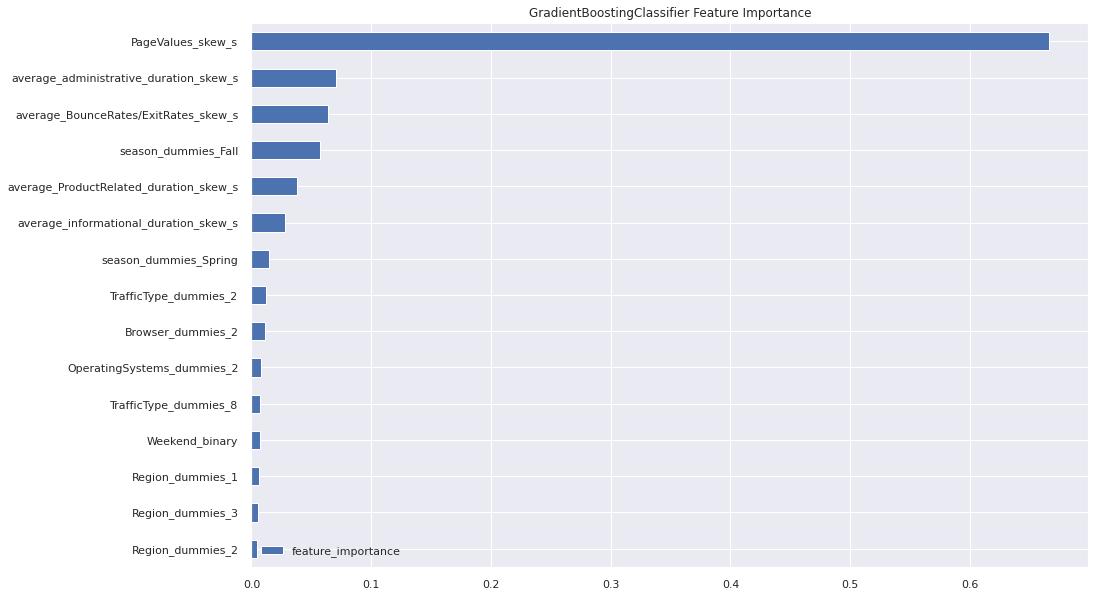

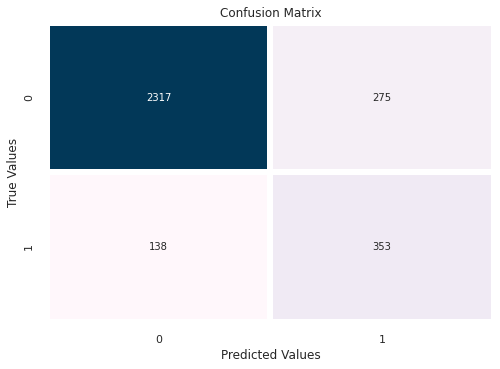

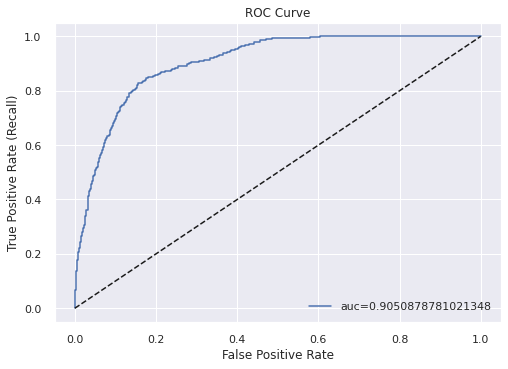

model bias (f1-score): 0.9066424086203331
model variance (f1-score): 0.003865655662907242
model bias (ROC/AUC): 0.9645237784602857
model variance (ROC/AUC): 0.0020538572355357923


In [8]:
from sklearn.ensemble import GradientBoostingClassifier


gbm_model_Xdata = df_X.copy() #making our X columns
best_features_spsa = ['Browser_dummies_2', 'TrafficType_dummies_8', 'Region_dummies_2', 'season_dummies_Spring', 'OperatingSystems_dummies_2', 'Region_dummies_3', 'Weekend_binary', 'Region_dummies_1',
       'TrafficType_dummies_2', 'average_informational_duration_skew_s', 'average_ProductRelated_duration_skew_s', 'average_administrative_duration_skew_s', 'average_BounceRates/ExitRates_skew_s',
       'season_dummies_Fall', 'PageValues_skew_s']

#getting the values of our x features:
Xgbm_model = gbm_model_Xdata[best_features_spsa].values
#Xgbm_model= gbm_model_Xdata[cols_2].values
#Xgbm_model = gbm_model_Xdata.values

#getting the values of our y:
y_gbm_model = df_y.values.ravel() # target



#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(Xgbm_model, y_gbm_model , test_size=0.25, random_state=123)

from imblearn.over_sampling import SMOTE

sm =SMOTE()
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)


gbm_model = GradientBoostingClassifier(learning_rate=0.05,n_estimators=1250,max_depth=4, min_samples_split=10,
                                       min_samples_leaf=1, subsample=0.8 , random_state=123,
                                      )

gbm_model.fit(X_train_bal, y_train_bal)

gbm_train_pred= gbm_model.predict(X_train_bal)

gbm_test_pred = gbm_model.predict(X_test)





print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,gbm_test_pred))
print("Precision:",precision_score(y_test,gbm_test_pred))
print("Recall:",recall_score(y_test,gbm_test_pred))
roc_auc = roc_auc_score(y_test, gbm_test_pred)
print('AUC' ,roc_auc)
print("f1",f1_score(y_test,  gbm_test_pred, average='weighted'))


print('Test Classification Report')
print(classification_report(y_test,gbm_test_pred))


#https://stackoverflow.com/questions/41900387/mapping-column-names-to-random-forest-feature-importances
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(best_features_spsa, gbm_model.feature_importances_):
    feats[feature] = importance #add the name/value pair 
sns.set()
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'feature_importance'})
importances.sort_values(by='feature_importance').plot(kind='barh', rot=0 , figsize=(15,10) ,title ='GradientBoostingClassifier Feature Importance')
plt.show()

y_scores = gbm_model.predict_proba(X_test)[:, 1]


confusion_matrix = confusion_matrix(y_test, gbm_test_pred)


sns.heatmap(confusion_matrix, annot=True,cmap = "PuBu"  ,fmt="d",
                annot_kws={'size':10},lw = 5,
                cbar=False)

plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix")
plt.show()

y_pred_proba = gbm_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.show()



X_bal,y_bal =  sm.fit_sample(Xgbm_model, y_gbm_model)

rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(gbm_model,X_bal,y_bal , scoring='f1', cv=rkf)
roc_auc_cv = cross_val_score(gbm_model,X_bal,y_bal , scoring='roc_auc', cv=rkf)

print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())

In [22]:
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
f1_scores_cv = cross_val_score(gbm_model,X_train_bal, y_train_bal, scoring='f1', cv=rkf)
roc_auc_cv = cross_val_score(gbm_model,X_train_bal, y_train_bal, scoring='roc_auc', cv=rkf)

print("model bias (f1-score):", f1_scores_cv.mean())
print("model variance (f1-score):", f1_scores_cv.std())
print("model bias (ROC/AUC):", roc_auc_cv.mean())
print("model variance (ROC/AUC):", roc_auc_cv.std())

model bias (f1-score): 0.9182926492858207
model variance (f1-score): 0.004286629526206325
model bias (ROC/AUC): 0.9698405182766582
model variance (ROC/AUC): 0.002196340954128006


In [9]:
import graphviz

from sklearn import tree
import pydotplus

from sklearn.tree import export_graphviz 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
# Get the last tree 
tree_last = gbm_model.estimators_[-1,0]

dot_data = tree.export_graphviz(
    tree_last,
    out_file=None, filled=True,
    rounded=True,  
    special_characters=True,
    proportion=True, feature_names=best_features,
)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

#graph = graphviz.Source(dot_data)  
#graph 


/opt/tljh/user/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


NameError: name 'best_features' is not defined